# Homework 1: Finding Similar Items: Textually Similar Documents

Date: 15/11/2021

Authors: Alessandro Sanvito and Thuany Karoline Stuart

## Set up

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time

from shingling import *
from min_hashing import *
from lsh import *
from compare_sets import *
from compare_signatures import *

sns.set_style('whitegrid')

C:\virtual_environments\ml_base_venv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\virtual_environments\ml_base_venv\lib\site-packages\numpy\.libs\libopenblas.2V74HQ3MKNZHDCKJELIPPY7V6QMK3UOZ.gfortran-win32.dll
C:\virtual_environments\ml_base_venv\lib\site-packages\numpy\.libs\libopenblas.U35RT5X5BPDSH5ZTF276YADQR2KDU6PR.gfortran-win32.dll
  stacklevel=1)


### Define Path

In [2]:
path = os.path.dirname(os.getcwd())
data_path = os.path.join(path, 'data', 'True.csv')
data_path

'C:\\Users\\thuan\\Documents\\Projects\\KTH\\ID2222-Data-Mining-Sanvito-Stuart\\lab1\\data\\True.csv'

### Load Data

In [3]:
df = pd.read_csv(data_path)
df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
print(f'Number of documents: {df.shape[0]}')

Number of documents: 21417


### Select Data

In [5]:
all_documents = df['title'].values

# Experiments

In [6]:
THRESHOLD = 0.1
SHINGLING_SIZE = 5

In [7]:
def get_approximated_similar_items(shingling, documents, band_size):
  start = time.time()
  
  shingling_tokens = map(lambda document: sh.shingling(document, k=SHINGLING_SIZE), documents)
  min_hashes = np.array([min_hash(token, 100) for token in shingling_tokens]).T
  similar_items = lsh(min_hashes, THRESHOLD, band_size)
  
  duration = time.time() - start

  return duration, similar_items

def get_similar_items(shingling, documents):
  start = time.time()

  shingling_tokens = list(map(lambda document: sh.shingling(document, k=SHINGLING_SIZE), documents))
  n = len(documents)
  similarities = np.zeros((n, n))

  for i in range(n-1):
    token_1 = shingling_tokens[i]
    for j in range(i + 1, n):
      token_2 = shingling_tokens[j]
      similarities[i, j] = compare_sets(token_1, token_2)

  similar_items = np.argwhere(similarities > THRESHOLD)
  duration = time.time() - start
  
  return duration, similar_items

### Similarity Distribution

In [8]:
sh = Shingling()
n = 1000
generator = np.random.default_rng(seed=42)
documents = generator.choice(all_documents, n)

shingling_tokens = list(map(lambda document: sh.shingling(document, k=SHINGLING_SIZE), documents))
similarities = []

for i in range(n-1):
  token_1 = shingling_tokens[i]
  for j in range(i + 1, n):
    token_2 = shingling_tokens[j]
    similarities.append(compare_sets(token_1, token_2))

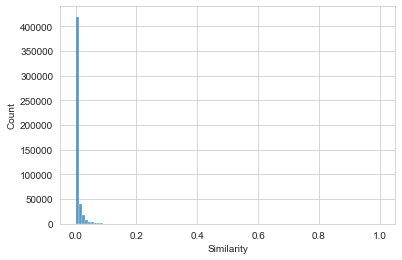

In [9]:
sns.histplot(x=similarities, bins=100)
plt.xlabel("Similarity")
plt.show()

### Execution Time

In [10]:
generator = np.random.default_rng(seed=42)

n_documents = [10, 100, 500, 1000, 2000, 3000, 4000, 5000]
durations = []
approx_durations = []
band_size = 50

for n in n_documents:
  sh = Shingling()
  documents = generator.choice(all_documents, n)
  
  approx_duration, approx_similar_items = get_approximated_similar_items(sh, documents, band_size)
  duration, similar_items = get_similar_items(sh, documents)
  
  approx_durations.append(approx_duration)
  durations.append(duration)

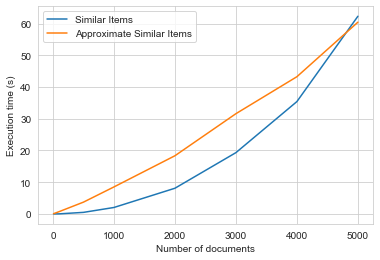

In [11]:
plt.plot(n_documents, durations, label='Similar Items')
plt.plot(n_documents, approx_durations, label='Approximate Similar Items')
plt.xlabel('Number of documents')
plt.ylabel('Execution time (s)')
plt.legend()
plt.show()

### Band Size

In [13]:
sh = Shingling()
generator = np.random.default_rng(seed=42)
documents = generator.choice(all_documents, 1000)
band_sizes = [5, 10, 20, 30, 40, 50]

n_pairs = []
approx_n_pairs = []
durations = []
approx_durations = []

for b in band_sizes:
  approx_duration, approx_similar_items = get_approximated_similar_items(sh, documents, b)
  duration, similar_items = get_similar_items(sh, documents)
  
  n_pairs.append(len(similar_items))
  approx_n_pairs.append(len(approx_similar_items))
  
  approx_durations.append(approx_duration)
  durations.append(duration)

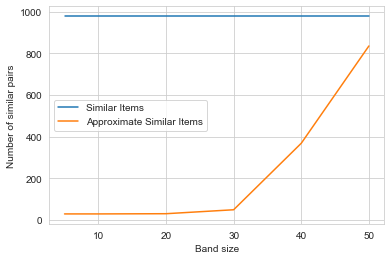

In [14]:
plt.plot(band_sizes, n_pairs, label='Similar Items')
plt.plot(band_sizes, approx_n_pairs, label='Approximate Similar Items')
plt.ylabel('Number of similar pairs')
plt.xlabel('Band size')
plt.legend()
plt.show()

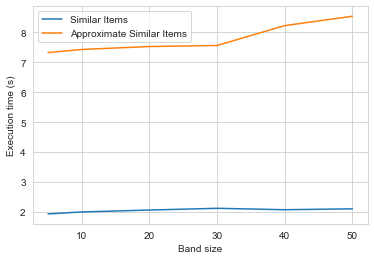

In [16]:
plt.plot(band_sizes, durations, label='Similar Items')
plt.plot(band_sizes, approx_durations, label='Approximate Similar Items')
plt.xlabel('Band size')
plt.ylabel('Execution time (s)')
plt.legend()
plt.show()